In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git


#All these packages need to be installed from pip
#These are all for the cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim#For topic modeling
import requests #For downloading our datasets
import numpy as np #for arrays
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning, it
%matplotlib inline

import itertools
import json

import pickle

In [2]:
news_df = pickle.load( open( "full_news_df.pkl", "rb" ) )

In [3]:
news_df[:3]

,title,date,country,source,url,text,tokens,normalized_tokens
24454129,Iowans to See Rollout of New Voter ID Rules in...,18-05-02,US,Public News Service,http://www.publicnewsservice.org/2018-05-02/se...,24454129 Media outlets access enhanced multi-...,"[medium, outlet, access, enhance, multi, platf...","[[medium, outlet, access, enhance, multi, plat..."
24454138,"Week of May 2, 2018",18-05-02,US,The Preston Citizen,https://www.prestoncitizen.com/news/week-of-ma...,"24454138 Week of May 2 , 2018 Quick highligh...","[week, quick, highlight, journalist, history, ...","[[week, quick, highlight, journalist, history,..."
24454140,Just a little: Small spot of land can yield lo...,18-05-02,US,Brazosport Facts,http://thefacts.com/living/article_e48f4eb0-f7...,"24454140 LAKE JACKSON -- The word "" garden "" ...","[lake, jackson, word, garden, create, sprawl, ...","[[lake, jackson], [word, garden, create, spraw..."


In [4]:
censored_df = pickle.load( open( "censored_df.pkl", "rb" ) )

In [5]:
censored_df[:3]

,link,date,headline,source,text,tokens,normalized_tokens
0,https://theantimedia.com/mike-pompeo-wants-mid...,11-Oct-18,Mike Pompeo: The US Wants the Entire Middle Ea...,"('MEMO', 'https://www.middleeastmonitor.com/20...",b'(MEMO)\xc2\xa0\xe2\x80\x94\xc2\xa0US Secreta...,"[secretary, state, mike, pompeo, say, yesterda...","[[secretary, state, mike, pompeo, say, yesterd..."
1,https://theantimedia.com/pressure-saudi-arabia...,11-Oct-18,Trump Pressures Saudi Arabia to Explain What H...,"('MEMO', 'https://www.middleeastmonitor.com/20...",b'(MEMO)\xc2\xa0\xe2\x80\x94\xc2\xa0US Preside...,"[president, donald, trump, increase, pressure,...","[[president, donald, trump, increase, pressure..."
2,https://theantimedia.com/western-democracy-bra...,9-Oct-18,Future of Western Democracy Being Played Out i...,"('CN', 'https://consortiumnews.com/2018/10/09/...","b'Stripped to its essence, the Brazilian presi...","[strip, essence, brazilian, presidential, elec...","[[strip, essence, brazilian, presidential, ele..."


## 1. Word phrases/Collocations/KL divergence

### Dispersion

#### News

In [6]:
#list for conspiracy token analysis
newsText_tokens = []
for i in news_df['tokens']:
    for x in i:
        newsText_tokens.append(x)


In [7]:
# create text
newsText = nltk.Text(newsText_tokens) 

NameError: name 'nltk' is not defined

/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


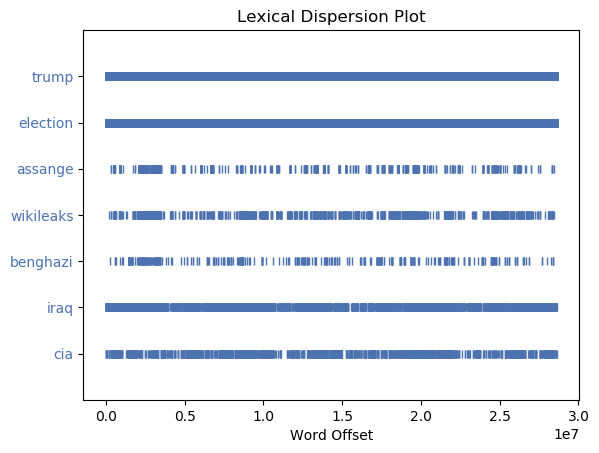

In [104]:
sns.reset_orig() #Seaborn messes with this plot, disabling it
newsText.dispersion_plot(['trump','election', 'assange', 'wikileaks' ,'benghazi', 'iraq', 'cia'])
sns.set() #Re-enabling seaborn|

In [22]:
newsText.common_contexts(['wikileaks'])

tweet_unfold host_founder response_disclosure take_founder
question_activity year_release associate_ecuador platform_critic
mainly_create contact_founder online_plaintiff be_cnn collude_russia
channel_founder hack_publish be_philadelphia be_ubisoft emerge_begin
clinton_begin clinton_founder


#### Censored

In [ ]:
#list for conspiracy token analysis
censoredText_tokens = []
for i in censored_df['tokens']:
    for x in i:
        censoredText_tokens.append(x)

# create text
censoredText = nltk.Text(censoredText_tokens) 

/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


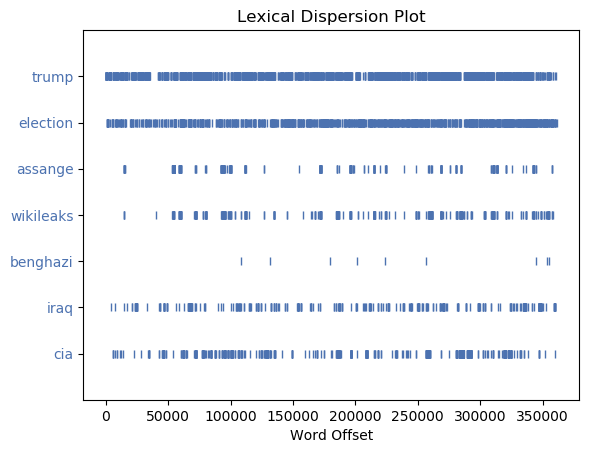

In [105]:
sns.reset_orig() #Seaborn messes with this plot, disabling it
censoredText.dispersion_plot(['trump','election', 'assange', 'wikileaks' ,'benghazi', 'iraq', 'cia'])
sns.set() #Re-enabling seaborn|

In [106]:
# common contexts
censoredText.common_contexts(['wikileaks'])

campaign_founder epic_disclosure go_hype
pic.twitter.com/qdo0frjbpj_@wikileaks campaign_coincidence act_run
fact_publish https://t.co/qnih7gmmre_@wikileaks
https://t.co/eahawtr8rc_@wikileaks assange_empire prosecute_editor
fate_editor material_effort follow_publication previous_disclosure
focus_publication assange_conduit publish_subsequently
coincidence_document assange_numerous


### Collocations

#### News


In [94]:
# wikileaks
newsIndex = nltk.text.ConcordanceIndex(newsText) 
newsIndex.print_concordance('wikileaks')

Displaying 25 of 25 matches:
 acronym point say era trend tweet wikileaks unfold story russia effort influen
t user like specific fox news host wikileaks founder julian assange old glory u
t user like specific fox news host wikileaks founder julian assange old glory u
oppy security measure lax response wikileaks disclosure embarrass hillary clint
nterview guardian say measure take wikileaks founder justify say current ban ba
ar subsequently extradite question wikileaks activity photograph frank augstein
sange big fear extradite jail year wikileaks release ten thousand classify mili
nth fbi interview people associate wikileaks ecuador want assange london embass
cratic email anti secrecy platform wikileaks critic meet clear evidence collusi
l email late publish slowly mainly wikileaks create steady drumbeat negative pr
 trump adviser roger stone contact wikileaks founder julian assange have ask ru
social security number dump online wikileaks plaintiff democratic national comm
ow harm ema

In [95]:
# assange
newsIndex.print_concordance('assange')

Displaying 25 of 25 matches:
 news host wikileaks founder julian assange old glory unite state constitution 
 news host wikileaks founder julian assange old glory unite state constitution 
ecuadorian government action julian assange cut communication outside world dis
le manner say q&amp;a happen julian assange leave ecuadorian embassy julian ass
nge leave ecuadorian embassy julian assange ecuadorian embassy central london a
phold warrant arrest skip bail mean assange face arrest leave embassy fear subs
helpful thank feedback long support assange right asylum foreign minister march
 end set date reconnection long say assange flee ecuadorian embassy seek asylum
know ecuador surveillance operation assange say visit embassy time conscious wa
long say foreign minister primarily assange security embassy staff give interes
ecurity embassy staff give interest assange difficult work environment inside e
 say concern security communication assange leave embassy likely face prison se
p bail esti

In [98]:
# drone
newsIndex.print_concordance('cia')

Displaying 25 of 25 matches:
e president dick cheney lawsuit bring cia official valerie congress suggest ver
e president donald trump nominee lead cia descend verbal spatting praise experi
ar secretary state mike pompeo pompeo cia director replace rex tillerson exxon 
e president donald trump nominee lead cia descend verbal spatting praise experi
sinformation campaign accord director cia russian bot successful plant wild ide
nor texas state guard observe federal cia director serve director national secu
e order conceal identity claim pastor cia back network christian missionary try
r news expect iran north korea israel cia matter round trump rhetoric policy de
deal north korea threat trump nominee cia director gina haspel face potentially
 democrat haspel potential woman lead cia finish line confirmation vote referen
 ad promote gina haspel trump nominee cia director urge resident manchin suppor
el wo reinstate enhance interrogation cia director nominee gina haspel face sen
bc alex joh

#### Censored

In [107]:
# censored
censoredIndex = nltk.text.ConcordanceIndex(censoredText) 

censoredIndex.print_concordance('wikileaks')

Displaying 25 of 25 matches:
whistleblower guardian 's campaign wikileaks founder julian assange disturb ass
ulian assange disturb assange epic wikileaks disclosure bring fame journalism p
nslaught kind rarely know penny go wikileaks hype guardian book lead lucrative 
i1gaedm pic.twitter.com/qdo0frjbpj wikileaks @wikileaks august chill line entir
rease establishment smear campaign wikileaks coincidence plan campaign remove a
ion orwellian dystopia patriot act wikileaks run anti semitic alt right troll l
 easily prove fabrication e.g fact wikileaks publish ecuadorian intelligence do
igence doc https://t.co/qnih7gmmre wikileaks @wikileaks july uk state tv john s
 newsnight https://t.co/eahawtr8rc wikileaks @wikileaks july say control narrat
itimize persecution julian assange wikileaks empire hate assange punch hole abi
long stand effort arrest prosecute wikileaks editor julian assange change strat
press independent outlet note fate wikileaks editor chief julian assange legal 
seek nail a

In [108]:
censoredIndex.print_concordance('assange')

Displaying 25 of 25 matches:
s campaign wikileaks founder julian assange disturb assange epic wikileaks disc
eaks founder julian assange disturb assange epic wikileaks disclosure bring fam
g david leigh gratuitously describe assange damage personality callous disclose
ital file contain u.s embassy cable assange trap ecuadorean embassy harding sta
n columnist suzanne moore write bet assange stuff flatten guinea pig massive tu
cribe feminist late complain attack assange suffer vile abuse edwards cromwell 
embassy smell like half year julian assange move slow wit viciousness appear ne
eness jealousy perverse recognition assange achieve journalistic first sniper c
ypo cj opinion attempt evict julian assange ecuadorian embassy london aggressiv
ks coincidence plan campaign remove assange political asylum greatly escalate s
ear campaign destroy public support assange occur time assange cut world intern
y public support assange occur time assange cut world internet phone call visit
t suzie daw

In [109]:
censoredIndex.print_concordance('cia')

Displaying 25 of 25 matches:
ration server power mri machine drone cia army accomplish tiny microchip big gr
 find department defense datum center cia 's drone operation onboard network na
ligence contractor receive investment cia back venture fund like company elemen
ent 's use torture form ill treatment cia detention program declassify public f
d serve u.s ambassador un mike pompeo cia director advocate bomb iran serve sec
on bully iran 's trade partner covert cia drive regime change operation ultimat
lican committee chairman ray mcgovern cia analyst year co found veteran intelli
emocracy ned cold war enterprise back cia director william casey jacobin 3/7/18
stand come u.s admit decade late role cia coup iran chile time come admission u
licans cheer president democrat cheer cia fbi platoon covert john mccains alleg
revoke security clearance early month cia chief john brennan get chance spew ha
nd death devastation year war 30-year cia veteran bruce riedel say unite state 
onal intell

In [110]:
# look out for words 
# "cia 's drone operation" 
# counterintelligence
# coup
# detention

### KL divergence

#### Dataset overlaps

In [ ]:
newsWords = set(news_df['tokens'].sum())
censoredWords = set(censored_df['tokens'].sum())

#Change & to | if you want to keep all words
overlapWords = newsWords & censoredWords

overlapWordsDict = {word: index for index, word in enumerate(overlapWords)}


In [ ]:
overlapWordsDict['drone']

In [ ]:
overlapWordsDict['assange']

In [ ]:
overlapWordsDict['russia']

The Notebook only wants words that appear in both:

    - Now we need to compare the two collection of words, remove those not found in both, and assign the remaining ones indices.

### KL Divergence

In [ ]:
# make arrays

def makeProbsArray(dfColumn, overlapDict):
    words = dfColumn.sum()
    countList = [0] * len(overlapDict)
    for word in words:
        try:
            countList[overlapDict[word]] += 1
        except KeyError:
            #The word is not common so we skip it
            pass
    countArray = np.array(countList)
    return countArray / countArray.sum()

newsProbArray = makeProbsArray(news_df['tokens'], overlapWordsDict)
censoredProbArray = makeProbsArray(censored_df['tokens'], overlapWordsDict)

#There is a little bit of a floating point math error
#but it's too small to see with print and too small matter here

In [ ]:
news_censoredDivergence = scipy.stats.entropy(newsProbArray, censoredProbArray)
print (news_censoredDivergence)
censored_newsDivergence = scipy.stats.entropy(censoredProbArray, newsProbArray)
print (censored_newsDivergence)

Then, we can do the elementwise calculation and see which words best distinguish the two corpora.

In [ ]:
news_censoredDivergence_ew = scipy.special.kl_div(newsProbArray, censoredProbArray)
kl_df = pandas.DataFrame(list(overlapWordsDict.keys()), columns = ['word'], index = list(overlapWordsDict.values()))
kl_df = kl_df.sort_index()
kl_df['elementwise divergence'] = news_censoredDivergence_ew
kl_df[:10]

In [ ]:
kl_df.sort_values(by='elementwise divergence', ascending=False)[:10]

## 2. Topic modeling

In [28]:
from gensim import corpora, models

#### News


In [38]:
newsTokens = news_df['tokens']

# Build bigram and trigram models after get_lemmas to see if there's anything relevant
news_bigram = models.Phrases(newsTokens, min_count=5)

# export trained model to use less memory:
bigram_mod = models.phrases.Phraser(news_bigram)

In [39]:
# turning into bigrams
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

# make bigrams
newsTokens = make_bigrams(newsTokens)

In [40]:
# Pre-processing
dictionary = corpora.Dictionary([i for i in newsTokens])

# Convert dictionary into bag of words format: list of (token_id, token_count) tuples
bow_corpus = [dictionary.doc2bow(text) for text in newsTokens]

In [42]:
gensim.corpora.MmCorpus.serialize('news.mm', bow_corpus)
newsmm = corpora.MmCorpus('news.mm')

In [44]:
# LDA Topic modelling
news_ldamodel = models.ldamodel.LdaModel(corpus=newsmm, id2word=dictionary, num_topics=10, 
                                         alpha='auto', eta='auto')



In [ ]:
news_ldamodel.save('news.model')

In [46]:
# show topics
news_topics = news_ldamodel.print_topics(num_words=20)

# Printing topics in hip hop df
for topic in news_topics:
    print(topic)

(0, '0.024*"say" + 0.011*"state" + 0.009*"city" + 0.008*"year" + 0.007*"school" + 0.007*"student" + 0.006*"work" + 0.006*"community" + 0.005*"new" + 0.005*"county" + 0.004*"election" + 0.004*"public" + 0.004*"$" + 0.004*"people" + 0.004*"member" + 0.004*"board" + 0.004*"office" + 0.003*"need" + 0.003*"district" + 0.003*"include"')
(1, '0.024*"trump" + 0.022*"say" + 0.009*"report" + 0.008*"president" + 0.007*"campaign" + 0.007*"investigation" + 0.006*"election" + 0.006*"time" + 0.005*"official" + 0.005*"fbi" + 0.005*"white_house" + 0.004*"committee" + 0.004*"russia" + 0.004*"tell" + 0.004*"flynn" + 0.004*"claim" + 0.004*"ask" + 0.004*"know" + 0.004*"call" + 0.004*"medium"')
(2, '0.013*"team" + 0.013*"game" + 0.011*"year" + 0.009*"play" + 0.009*"season" + 0.008*"player" + 0.008*"say" + 0.007*"time" + 0.007*"win" + 0.005*"well" + 0.005*"go" + 0.005*"come" + 0.004*"coach" + 0.004*"get" + 0.004*"big" + 0.004*"run" + 0.003*"find_particularly" + 0.003*"comment_editor" + 0.003*"useful_relevant

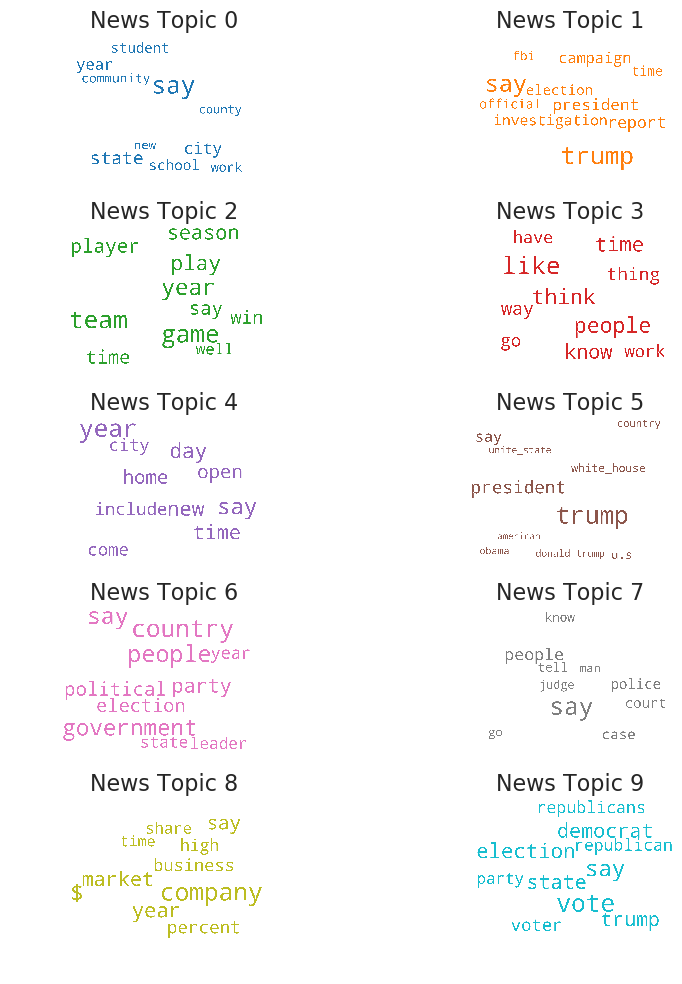

In [56]:
# Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)


topics = news_ldamodel.show_topics(formatted=False)


fig, axes = plt.subplots(5, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    #ax.set_title('HELP')
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('News Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


In [ ]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(news_ldamodel, newsmm, dictionary=dictionary)
vis


In [ ]:
## bonus, topic participation over time....

def fill_topic_weights(df_row, bow_corpus):
    try:
        for i in news_ldamodel[bow_corpus[df_row.name]]:
            df_row[str(i[0])] = i[1]
    except:
        return df_row
    return df_row

In [ ]:
news_df = news_df.apply(fill_topic_weights, axis=1, args=[bow_corpus]).fillna(0)


In [ ]:
#plot
news_df[['0','1','2','3','4','date']].groupby('date').mean().plot()


#### Censored

In [80]:
censored_df.columns

Index(['link', 'date', 'headline', 'source', 'text', 'tokens',
       'normalized_tokens'],
      dtype='object')

In [66]:
cenTokens = censored_df['tokens']

# Build bigram and trigram models after get_lemmas to see if there's anything relevant
cen_bigram = models.Phrases(cenTokens, min_count=5)

# export trained model to use less memory:
censored_bigram_mod = models.phrases.Phraser(cen_bigram)

In [67]:
# turning into bigrams
def make_bigrams(texts):
    return [censored_bigram_mod[doc] for doc in texts]

# make bigrams
cenTokens = make_bigrams(cenTokens)

In [74]:
#create dict
dictionary_censored = corpora.Dictionary([i for i in cenTokens])

# Convert dictionary into bag of words format: list of (token_id, token_count) tuples
bow_corpus_censored = [dictionary_censored.doc2bow(text) for text in cenTokens]


In [76]:
gensim.corpora.MmCorpus.serialize('censored.mm', bow_corpus_censored)
censoredmm = corpora.MmCorpus('censored.mm')

In [77]:
# LDA Topic modelling
censored_ldamodel = models.ldamodel.LdaModel(corpus=censoredmm, id2word=dictionary_censored, num_topics=10, 
                                         alpha='auto', eta='auto')


/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

In [78]:
# show topics
censored_topics = censored_ldamodel.print_topics(num_words=20)

# Printing topics in hip hop df
for topic in censored_topics:
    print(topic)

(0, '0.025*"\'s" + 0.008*"trump" + 0.007*"say" + 0.005*"israel" + 0.004*"russia" + 0.004*"time" + 0.003*"like" + 0.003*"report" + 0.003*"state" + 0.003*"country" + 0.003*"people" + 0.003*"president" + 0.002*"iran" + 0.002*"government" + 0.002*"campaign" + 0.002*"medium" + 0.002*"know" + 0.002*"election" + 0.002*"year" + 0.002*"u.s"')
(1, '0.022*"\'s" + 0.005*"trump" + 0.005*"government" + 0.005*"say" + 0.004*"people" + 0.004*"u.s" + 0.004*"time" + 0.004*"report" + 0.004*"country" + 0.004*"n’t" + 0.003*"state" + 0.003*"iran" + 0.003*"israel" + 0.003*"like" + 0.003*"president" + 0.003*"claim" + 0.003*"russia" + 0.003*"year" + 0.003*"know" + 0.002*"new"')
(2, '0.028*"\'s" + 0.009*"trump" + 0.006*"say" + 0.004*"n’t" + 0.004*"report" + 0.004*"people" + 0.004*"russia" + 0.003*"time" + 0.003*"country" + 0.003*"u.s" + 0.003*"like" + 0.003*"come" + 0.003*"year" + 0.003*"government" + 0.003*"state" + 0.003*"support" + 0.003*"election" + 0.002*"clinton" + 0.002*"medium" + 0.002*"new"')
(3, '0.015

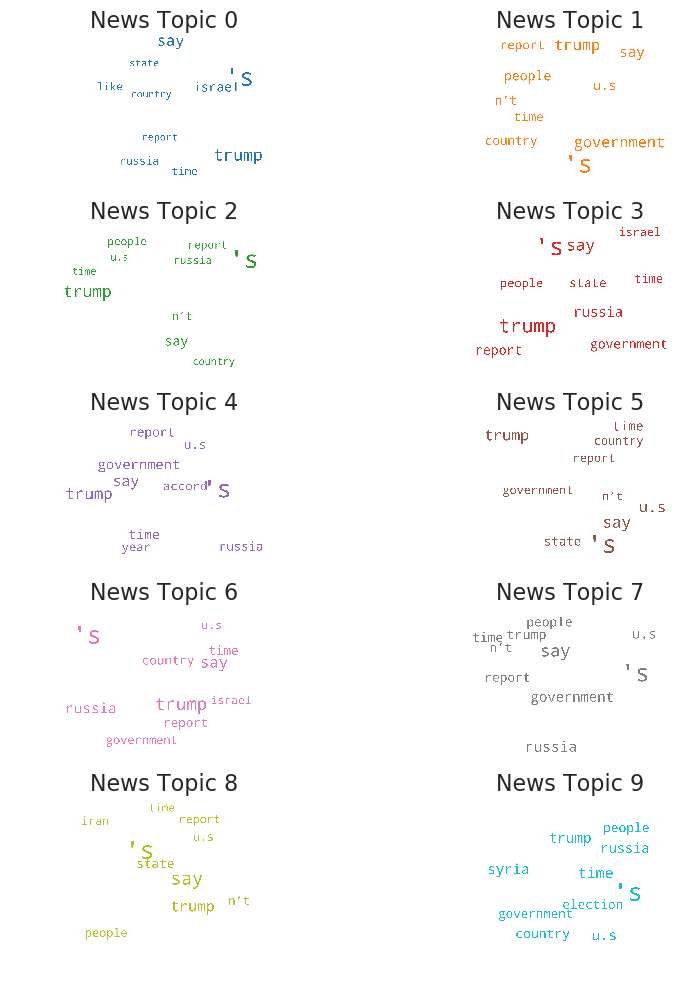

In [79]:
# Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)


topics = censored_ldamodel.show_topics(formatted=False)


fig, axes = plt.subplots(5, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    #ax.set_title('HELP')
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('News Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


In [81]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(censored_ldamodel, censoredmm, dictionary=dictionary_censored)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.007627  0.007139       1        1  23.863510
1     -0.002203 -0.000089       2        1  15.803925
8      0.003798  0.003710       3        1  12.285542
9     -0.002927 -0.006227       4        1   9.576796
4     -0.001456  0.006777       5        1   9.324976
5     -0.001420 -0.000254       6        1   9.017364
0      0.008475 -0.004815       7        1   8.766144
3     -0.001838 -0.000562       8        1   4.989135
7     -0.012300  0.001714       9        1   3.264897
6      0.002245 -0.007392      10        1   3.107721, topic_info=     Category         Freq          Term        Total  loglift  logprob
1     Default  7331.000000            's  7331.000000  30.0000  30.0000
167   Default  2223.000000         trump  2223.000000  29.0000  29.0000
139   Default  1947.000000           say  1947.000000  28.0000  28.0000
2468  Default  1059.000000        russia  1059.000000  27.0000  27.0000
272   Default  1142.000000    government  1142.000000  26.0000  26.0000
1275  Default  1176.000000           u.s  1176.000000  25.0000  25.0000
164   Default  1201.000000          time  1201.000000  24.0000  24.0000
80    Default   848.000000        israel   848.000000  23.0000  23.0000
136   Default  1170.000000        report  1170.000000  22.0000  22.0000
1454  Default   605.000000         syria   605.000000  21.0000  21.0000
32    Default  1037.000000       country  1037.000000  20.0000  20.0000
151   Default  1060.000000         state  1060.000000  19.0000  19.0000
121   Default  1131.000000        people  1131.000000  18.0000  18.0000
108   Default  1060.000000           n’t  1060.000000  17.0000  17.0000
694   Default   816.000000      election   816.000000  16.0000  16.0000
79    Default   819.000000          iran   819.000000  15.0000  15.0000
1339  Default   570.000000         world   570.000000  14.0000  14.0000
170   Default   620.000000   unite_state   620.000000  13.0000  13.0000
123   Default   704.000000     president   704.000000  12.0000  12.0000
180   Default   880.000000          year   880.000000  11.0000  11.0000
2     Default   610.000000        accord   610.000000  10.0000  10.0000
274   Default   498.000000         group   498.000000   9.0000   9.0000
419   Default   627.000000           war   627.000000   8.0000   8.0000
161   Default   415.000000         think   415.000000   7.0000   7.0000
283   Default   717.000000       include   717.000000   6.0000   6.0000
421   Default   412.000000           way   412.000000   5.0000   5.0000
536   Default   546.000000      campaign   546.000000   4.0000   4.0000
223   Default   712.000000          come   712.000000   3.0000   3.0000
2299  Default   512.000000           cia   512.000000   2.0000   2.0000
396   Default   722.000000       support   722.000000   1.0000   1.0000
...       ...          ...           ...          ...      ...      ...
80    Topic10    34.489090        israel   848.230408   0.2688  -5.6993
1522  Topic10     6.697264  conversation   105.708290   0.7123  -7.3382
123   Topic10    28.909058     president   704.566650   0.2779  -5.8758
136   Topic10    41.772766        report  1170.345459   0.1385  -5.5077
3808  Topic10     6.301969        mccain   102.843918   0.6789  -7.3991
79    Topic10    31.088221          iran   819.339722   0.1996  -5.8031
164   Topic10    41.663750          time  1201.173706   0.1099  -5.5103
803   Topic10    17.120552          have   380.128540   0.3711  -6.3997
272   Topic10    37.862431    government  1142.843384   0.0640  -5.6060
1339  Topic10    22.451408         world   570.547241   0.2360  -6.1286
875   Topic10    17.014780          lead   402.561890   0.3075  -6.4059
283   Topic10    25.236784       include   717.161255   0.1243  -6.0116
1275  Topic10    34.901890           u.s  1176.943848  -0.0469  -5.6874
919   Topic10    15.612674          meet   373.655853   0.2960  -6.49

In [86]:
#fill topic weights by videos
def fill_topic_weights(df_row, bow_corpus):
    try:
        for i in censored_ldamodel[bow_corpus[df_row.name]]:
            df_row[str(i[0])] = i[1]
    except:
        return df_row
    return df_row


In [87]:
censored_df = censored_df.apply(fill_topic_weights, axis=1, args=[bow_corpus_censored]).fillna(0)


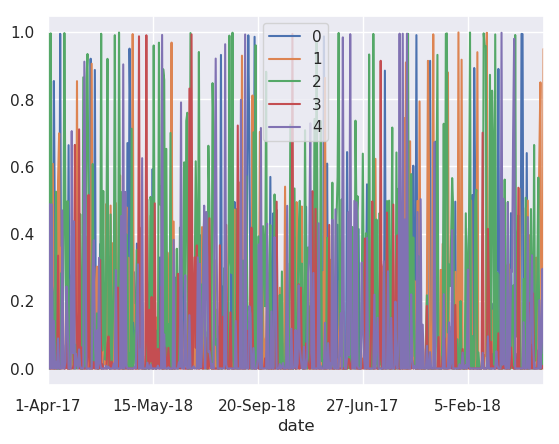

In [89]:
#plot
censored_df[['0','1','2','3','4','date']].groupby('date').mean().plot()
